# SVHN DATASET

In [3]:
'''Can be found at: 
http://ufldl.stanford.edu/housenumbers/
'''

'Can be found at: \nhttp://ufldl.stanford.edu/housenumbers/\n'

# Imports

In [4]:
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

# Load the Data

In [6]:
train = loadmat('./data/train_32x32.mat')
test = loadmat('./data/test_32x32.mat')

In [7]:
X_train = train['X']/ 255.
y_train = train['y']
X_test = test['X']/ 255.
y_test = test['y']

In [8]:
y_train.shape #sanity check

(73257, 1)

In [9]:
X_train.shape #sanity check

(32, 32, 3, 73257)

## Change Data to Numpy Array (so can feed into Model)

In [10]:
#Change data to numpy array 
n_train = len(y_train)
train_X = np.asarray([X_train[:,:,:,i] for i in range(n_train)])
train_y = np.asarray([y_train[i][0] for i in range(n_train)])


In [11]:
#Change data to numpy array
n_test = len(y_test)
test_X = np.asarray([X_test[:,:,:,i] for i in range(n_test)])
test_y = np.asarray([y_test[i][0] for i in range(n_test)])

## Change target's 0 from 10 to 0

In [12]:
train_y[train_y == 10] = 0
test_y[test_y == 10] = 0

In [13]:
#check and make sure my 0's are labeled as 0's (not 10's)
train_y[52:100]

array([0, 1, 2, 4, 5, 6, 5, 2, 1, 3, 2, 1, 4, 6, 3, 8, 4, 3, 1, 4, 4, 2,
       6, 4, 4, 1, 1, 1, 7, 3, 1, 2, 0, 4, 2, 2, 5, 1, 2, 9, 2, 0, 4, 1,
       0, 3, 2, 7], dtype=uint8)

## Graph some images

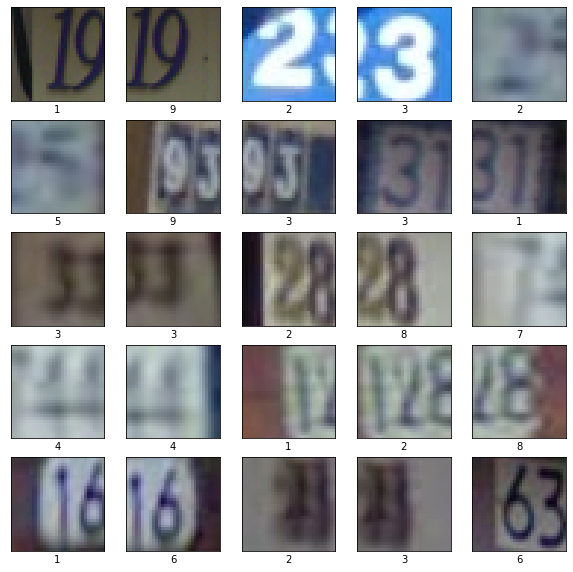

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_y[i])
plt.show()

## Build the Model

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Complie and Train the Model

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=10, 
                    validation_data=(test_X, test_y))

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 47s 648us/sample - loss: 0.8382 - accuracy: 0.7324 - val_loss: 0.4914 - val_accuracy: 0.8604
Epoch 2/10
73257/73257 [==============================] - 47s 639us/sample - loss: 0.4033 - accuracy: 0.8822 - val_loss: 0.4169 - val_accuracy: 0.8811
Epoch 3/10
73257/73257 [==============================] - 48s 657us/sample - loss: 0.3357 - accuracy: 0.9009 - val_loss: 0.3822 - val_accuracy: 0.8900
Epoch 4/10
73257/73257 [==============================] - 52s 706us/sample - loss: 0.2990 - accuracy: 0.9113 - val_loss: 0.3626 - val_accuracy: 0.8964
Epoch 5/10
73257/73257 [==============================] - 49s 674us/sample - loss: 0.2699 - accuracy: 0.9208 - val_loss: 0.3563 - val_accuracy: 0.9009
Epoch 6/10
73257/73257 [==============================] - 52s 708us/sample - loss: 0.2491 - accuracy: 0.9264 - val_loss: 0.3408 - val_accuracy: 0.9027
Epoch 7/10
73257/73257 [====================

## Evaluate the model

26032/1 - 7s - loss: 0.2181 - accuracy: 0.9041


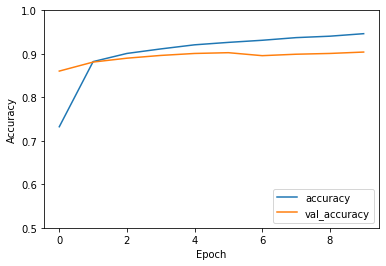

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

In [19]:
print(test_acc)

0.904118
